In [1]:
import numpy as np
!pip install astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [2]:

bias_files = [
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160850_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160850_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160852_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160853_frame0004.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160854_frame0005.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160855_frame0006.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160856_frame0007.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160857_frame0008.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160859_frame0009.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Bias_capella_0sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_160900_frame0010.fit'
]


bias_data = [fits.getdata(i) for i in bias_files]

bias_stack = np.dstack(bias_data)  
bias_mean = bias_stack.mean(axis=2)
#bias_mean is the master_bias

bias_std= bias_stack.std(axis=0, ddof=1)


In [3]:
np.shape(bias_stack)
#The array is a 3D stacked array so it has 3 numbers tuple. This is the rows, 
#columns, and the frame count which was 10.

(5644, 8288, 10)

In [4]:
RMS_bias = np.std(bias_stack, axis=0)
print(RMS_bias)

#If 5655 is the row and 8288 is the column then setting axis to 0 is setting the origin for the row 
#is horizonal axis and the column is vertical axis. The axis to 0 allows standard deviation to correctly
#go across all pixels in the frames

[[14.92116536 14.83051681 14.86305158 ... 14.97842433 15.27023539
  15.39702973]
 [13.93019005 13.7244605  13.7249102  ... 13.75265343 13.77301728
  13.69762532]
 [14.60932319 14.740845   14.71202536 ... 14.77256325 14.80810336
  14.7817023 ]
 ...
 [13.70502403 13.90891376 13.94167969 ... 13.39664227 13.98012567
  13.85772296]
 [14.96203381 14.91885891 15.03916942 ... 14.73330317 14.79848263
  14.86271012]
 [13.63179329 13.59731497 13.82174944 ... 13.96845507 13.83441926
  14.03268002]]


In [5]:
mean_bias= np.mean(RMS_bias)
median_bias= np.median(RMS_bias)
std_bias= np.std(RMS_bias)

print(mean_bias)
print(median_bias)
print(std_bias)

#The red noise value is either 12.97 or 12.83 since it can be either mean or median.

12.965732922212986
12.829375094371787
0.4791329553299399


In [6]:
dark_files = [
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_0.2sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162110_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_0.2sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162111_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_0.2sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162112_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_125sec_Bin1_filter-Clear_-5.3C_gain0_2025-01-28_161501_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_125sec_Bin1_filter-Clear_-5.3C_gain0_2025-01-28_161707_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_125sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_161913_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_1sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162101_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_1sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162103_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_1sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162106_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_25sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_161942_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_25sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162008_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_25sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162034_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_5sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162044_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_5sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162050_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_5sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162056_frame0003.fit',
]

darks_data= [fits.getdata(i) for i in dark_files]

In [7]:
for filename in dark_files:
    header = fits.getheader(filename)
    print(filename, header['EXPTIME'])
    
exp_times = [fits.getheader(filename)['EXPTIME'] for filename in dark_files]
exp = tuple(exp_times)

/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_0.2sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162110_frame0001.fit 0.2
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_0.2sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162111_frame0002.fit 0.2
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_0.2sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162112_frame0003.fit 0.2
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_125sec_Bin1_filter-Clear_-5.3C_gain0_2025-01-28_161501_frame0001.fit 125.0
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_125sec_Bin1_filter-Clear_-5.3C_gain0_2025-01-28_161707_frame0002.fit 125.0
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_125sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_161913_frame0003.fit 125.0
/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Dark_capella_1sec_Bin1_filter-Clear_-4.9C_gain0_2025-01-28_162101_frame0001.fit 1.0
/System/Volumes/Data/Us

In [8]:
mean_darks = np.mean(darks_data)
print("Mean value =",mean_darks)
median_darks = np.median(darks_data)
print("Median value =",median_darks)

Mean value = 1952.1097607782938
Median value = 1904.0


In [9]:
bias_subtracted_dark = darks_data - bias_mean

#This is done to get rid of the thermal noise from the camera in the dark frames

In [10]:
mean_dark_current = np.mean(bias_subtracted_dark)

print("Dark current counts =", mean_dark_current)

Dark current counts = 48.09212531479535


In [11]:
dark_groups = {}  
for exp_time, data in zip(exp_times, darks_data):
    if exp_time not in dark_groups:
        dark_groups[exp_time] = [] 
    dark_groups[exp_time].append(data)


master_darks = {exp_time: np.median(np.dstack(frames), axis=2) for exp_time, frames in dark_groups.items()}


master_dark_means = {exp_time: np.mean(master_dark) for exp_time, master_dark in master_darks.items()}


for exp_time, mean_value in sorted(master_dark_means.items()):
    print("Exposure Time:", {exp_time}," sec - Mean of Master Dark:", {mean_value})
    
    #https://realpython.com/python-zip-function/

Exposure Time: {0.2}  sec - Mean of Master Dark: {1903.4012673451016}
Exposure Time: {1.0}  sec - Mean of Master Dark: {1902.5922960522535}
Exposure Time: {5.0}  sec - Mean of Master Dark: {1902.7350447668484}
Exposure Time: {25.0}  sec - Mean of Master Dark: {1904.4564877725757}
Exposure Time: {125.0}  sec - Mean of Master Dark: {2148.1170153017247}


In [12]:
import pandas as pd 

table = {'Exposure Time': list(master_dark_means.keys()), 
         'Mean Value': list(master_dark_means.values())}

df = pd.DataFrame(table)

print(df)

#https://stackoverflow.com/questions/39050539/how-to-add-multiple-columns-to-pandas-dataframe-in-one-assignment



   Exposure Time   Mean Value
0            0.2  1903.401267
1          125.0  2148.117015
2            1.0  1902.592296
3           25.0  1904.456488
4            5.0  1902.735045


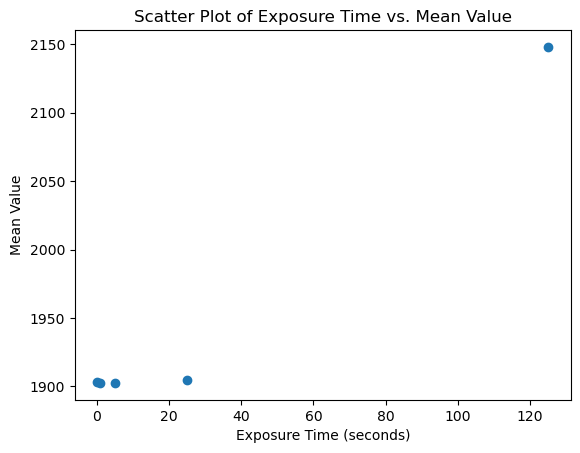

In [13]:

x = df['Exposure Time']
y = df['Mean Value']

plt.scatter(x, y)
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Mean Value')
plt.title('Scatter Plot of Exposure Time vs. Mean Value')
plt.show()

#It looks like 125s exposure time had a much higher mean of pixels, otherwise
#all of the expose times kind of fall in line near eachother in the same range

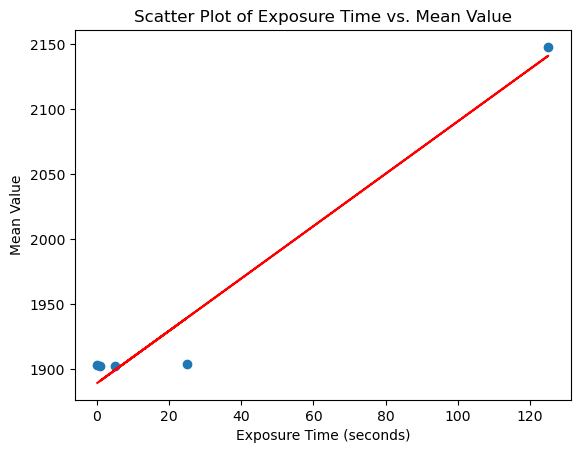

In [14]:
coefficients = np.polyfit(x, y, 1)
fitted_values = np.polyval(coefficients, x)

plt.scatter(x, y)
plt.plot(x, fitted_values, color='red', label='Polynomial Fit')

plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Mean Value')
plt.title('Scatter Plot of Exposure Time vs. Mean Value')
plt.show()

In [15]:
slope = coefficients[0]
intercept = coefficients[1]

print(f"The equation of the line is: y = {slope}x + {intercept}")

print(f"Dark Current Rate: {slope} pixel/second")

#Using my coefficients, this gives me the slope equation and the value, which is
#2.02 pixels per second.

#https://www.w3schools.com/datascience/ds_linear_slope.asp

The equation of the line is: y = 2.016426741232174x + 1889.2672508516066
Dark Current Rate: 2.016426741232174 pixel/second


In [16]:
bright_files = [
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_0.05sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203141_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_0.05sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203142_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_0.05sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203143_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_0.3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203135_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_0.3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203136_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_0.3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203137_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_100sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_202716_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_100sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_202857_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_100sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_202535_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_10sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203046_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_10sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203057_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_10sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203108_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_1sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203127_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_1sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203129_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_1sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203131_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_30sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_202931_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_30sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203002_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_30sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_203033_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_3sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203115_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_3sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203119_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_bright flat_3sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203123_frame0003.fit',
]

bright_data= [fits.getdata(i) for i in bright_files]

In [17]:
bias_subtracted_bright = bright_data - bias_mean

In [18]:
bright_groups = {}  
for exp_time, data in zip(exp_times, bias_subtracted_bright):
    if exp_time not in bright_groups:
        bright_groups[exp_time] = [] 
    bright_groups[exp_time].append(data)


master_bright = {exp_time: np.median(np.dstack(frames), axis=2) for exp_time, frames in bright_groups.items()}


master_bright_means = {exp_time: np.mean(master_bright) for exp_time, master_bright in master_bright.items()}


for exp_time, mean_value in sorted(master_bright_means.items()):
    print("Exposure Time:", {exp_time}, " sec - Mean of Master Bright:", {mean_value})
    

Exposure Time: {0.2}  sec - Mean of Master Bright: {25.412645847984244}
Exposure Time: {1.0}  sec - Mean of Master Bright: {45175.187789917334}
Exposure Time: {5.0}  sec - Mean of Master Bright: {505.74800693804}
Exposure Time: {25.0}  sec - Mean of Master Bright: {4565.77309491199}
Exposure Time: {125.0}  sec - Mean of Master Bright: {135.93692899009181}


In [19]:
faint_files = [
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_0.05sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204212_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_0.05sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204213_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_0.05sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204214_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_0.3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204206_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_0.3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204207_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_0.3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204209_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_100sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203607_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_100sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203748_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_100sec_Bin1_filter-B_-5.3C_gain0_2025-01-28_203929_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_10sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204118_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_10sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204129_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_10sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204140_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_1sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204159_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_1sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204201_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_1sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204203_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_30sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204002_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_30sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204034_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_30sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204104_frame0003.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204146_frame0001.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204150_frame0002.fit',
    '/System/Volumes/Data/Users/zeinakellybenton/obs_tech/Flat_faint flat_3sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_204154_frame0003.fit',
]

faint_data= [fits.getdata(i) for i in faint_files]

In [20]:
bias_subtracted_faint = faint_data - bias_mean

In [21]:
faint_groups = {}  
for exp_time, data in zip(exp_times, bias_subtracted_faint):
    if exp_time not in faint_groups:
        faint_groups[exp_time] = [] 
        faint_groups[exp_time].append(data)


master_faint = {exp_time: np.median(np.dstack(frames), axis=2) for exp_time, frames in faint_groups.items()}


master_faint_means = {exp_time: np.mean(master_faint) for exp_time, master_faint in master_faint.items()}


for exp_time, mean_value in sorted(master_faint_means.items()):
    print("Exposure Time:", {exp_time}," sec - Mean of Master Faint:", {mean_value})
 

Exposure Time: {0.2}  sec - Mean of Master Faint: {11.804168331285632}
Exposure Time: {1.0}  sec - Mean of Master Faint: {18850.472832084728}
Exposure Time: {5.0}  sec - Mean of Master Faint: {209.4222682576776}
Exposure Time: {25.0}  sec - Mean of Master Faint: {1872.4357537235019}
Exposure Time: {125.0}  sec - Mean of Master Faint: {56.629223947801286}


In [22]:
bright_table = {'Exposure Time': list(master_bright_means.keys()), 
                'Mean Value': list(master_bright_means.values())}
df_bright = pd.DataFrame(bright_table)

faint_table = {'Exposure Time': list(master_faint_means.keys()), 
               'Mean Value': list(master_faint_means.values())}  
df_faint = pd.DataFrame(faint_table)

print("Bright Frames DataFrame:")
print(df_bright)

print("\nFaint Frames DataFrame:")
print(df_faint)



Bright Frames DataFrame:
   Exposure Time    Mean Value
0            0.2     25.412646
1          125.0    135.936929
2            1.0  45175.187790
3           25.0   4565.773095
4            5.0    505.748007

Faint Frames DataFrame:
   Exposure Time    Mean Value
0            0.2     11.804168
1          125.0     56.629224
2            1.0  18850.472832
3           25.0   1872.435754
4            5.0    209.422268


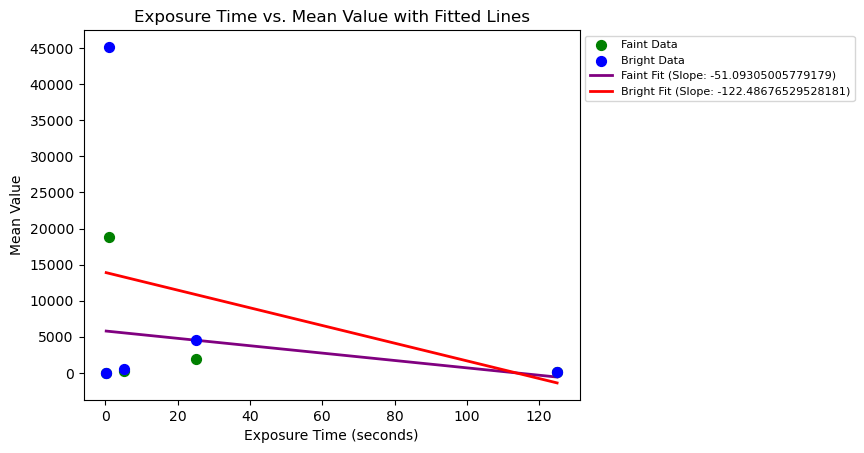

In [68]:
x_faint = df_faint['Exposure Time'].values
y_faint = df_faint['Mean Value'].values

x_bright = df_bright['Exposure Time'].values
y_bright = df_bright['Mean Value'].values


x_faint_fit = np.linspace(min(x_faint), max(x_faint), 100)
x_bright_fit = np.linspace(min(x_bright), max(x_bright), 100)


coeff_faint = np.polyfit(x_faint, y_faint, 1)
coeff_bright = np.polyfit(x_bright, y_bright, 1)

y_faint_fit = np.polyval(coeff_faint, x_faint_fit)
y_bright_fit = np.polyval(coeff_bright, x_bright_fit)

plt.scatter(x_faint, y_faint, color='green', label='Faint Data', s=50, zorder=3)
plt.scatter(x_bright, y_bright, color='blue', label='Bright Data', s=50, zorder=3)

plt.plot(x_faint_fit, y_faint_fit, color='purple', label=f'Faint Fit (Slope: {coeff_faint[0]})', linewidth=2)
plt.plot(x_bright_fit, y_bright_fit, color='red', label=f'Bright Fit (Slope: {coeff_bright[0]})', linewidth=2)
                                                           

plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Mean Value')
plt.title('Exposure Time vs. Mean Value with Fitted Lines')

plt.yticks(np.arange(0, 45001, 5000))

plt.legend(prop={'size': 8}, loc='upper left', bbox_to_anchor=(1,1))

plt.show()


In [56]:
print(f"Bright Fit: y = {coeff_bright[0]}x + {coeff_bright[1]}")
print(f"Faint Fit: y = {coeff_faint[0]}x + {coeff_faint[1]}")

print(f"Bright Current Rate: {coeff_bright[0]} pixel/second")
print(f"Faint Current Rate: {coeff_faint[0]} pixel/second")

#This shows that the bright current rate is around -122.49 pixels/s and faint current rate is -51.1 pixel/s


Bright Fit: y = -122.48676529528181x + 13908.098241145692
Faint Fit: y = -51.09305005779179x + 5796.299733074413
Bright Current Rate: -122.48676529528181 pixel/second
Faint Current Rate: -51.09305005779179 pixel/second


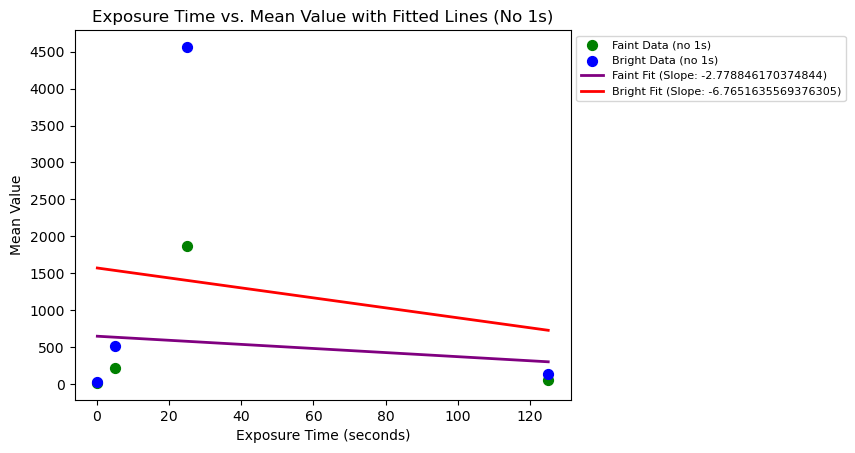

In [67]:

df_faint_filtered = df_faint[df_faint['Exposure Time'] != 1.0]
df_bright_filtered = df_bright[df_bright['Exposure Time'] != 1.0]


x_faint_filtered = df_faint_filtered['Exposure Time']
y_faint_filtered = df_faint_filtered['Mean Value']

x_bright_filtered = df_bright_filtered['Exposure Time']
y_bright_filtered = df_bright_filtered['Mean Value']

coeff_faint_filtered = np.polyfit(x_faint_filtered, y_faint_filtered, 1) 
coeff_bright_filtered = np.polyfit(x_bright_filtered, y_bright_filtered, 1)


fitted_faint_filtered = np.polyval(coeff_faint_filtered, x_faint_filtered)
fitted_bright_filtered = np.polyval(coeff_bright_filtered, x_bright_filtered)


plt.scatter(x_faint_filtered, y_faint_filtered, color='green', label='Faint Data (no 1s)', s=50, zorder=3)
plt.scatter(x_bright_filtered, y_bright_filtered, color='blue', label='Bright Data (no 1s)', s=50, zorder=3)


plt.plot(x_faint_filtered, fitted_faint_filtered, color='purple', label=f'Faint Fit (Slope: {coeff_faint_filtered[0]})', linewidth=2)
plt.plot(x_bright_filtered, fitted_bright_filtered, color='red', label=f'Bright Fit (Slope: {coeff_bright_filtered[0]})', linewidth=2)


plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Mean Value')
plt.title('Exposure Time vs. Mean Value with Fitted Lines (No 1s)')

plt.yticks(np.arange(0, 4501, 500))


plt.legend(prop={'size': 8}, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

In [58]:

print(f"Bright Fit: y = {coeff_bright_filtered[0]}x + {coeff_bright_filtered[1]}")
print(f"Faint Fit: y = {coeff_faint_filtered[0]}x + {coeff_faint_filtered[1]}")

print(f"Bright Current Rate: {coeff_bright_filtered[0]} pixel/second")
print(f"Faint Current Rate: {coeff_faint_filtered[0]} pixel/second")

#Bright slope is -6.77 and faint slope is -2.78 when removing 1s outlier.


Bright Fit: y = -6.7651635569376305x + 1570.706015181207
Faint Fit: y = -2.778846170374844x + 645.3920849756108
Bright Current Rate: -6.7651635569376305 pixel/second
Faint Current Rate: -2.778846170374844 pixel/second


Questions #5 through #8

The bright flat frames appear to, over the same exposure time as faint flat frames, reach higher mean values of pixels over seconds. This is also shown in the slope values (current rates), however in the negative slope it appears either in computatonal error or in error or recording these frames, data has been skewed over specifically the 1s exposure time. Thee slope being negative could mean that as exposure time increases, the average pixel value decreases. I can assume from this that these values shown that changing light levels did in fact affect the amount of ADU/pixels that escape through to the detector. My fitted lines for both appear to be linear. My outliers are the 1s exposure times as they are extremely high compared to the others. It is most likely due to light from another source being caught by the detector like the open door or a window crack or even the Ipad light be exposed too much. The negative slope could be from saturation too. These results could be dark current is playing a large role in my data since I was not instructed to subtract it yet in this step (#3) only subtract naster bias.

I attempted in another plot to see if removing the outlier would make theline fit differently. The 25s exposure time also overpowered once that was removed as another outlier.


In [59]:
#This first step in gain was repeated, I already subtracted bias from brights
#and made a master bright as well.

RMS_master_bright = {i: np.std(np.array(frames), axis=0) for i, frames in bright_groups.items()}
print(RMS_master_bright)

{0.2: array([[ 7.54247233, 19.95550606,  7.54247233, ...,  7.54247233,
        15.08494467,  7.54247233],
       [ 7.54247233, 19.95550606, 13.06394529, ...,  0.        ,
        13.06394529, 15.08494467],
       [13.06394529,  7.54247233,  0.        , ...,  7.54247233,
         7.54247233, 13.06394529],
       ...,
       [ 7.54247233, 19.95550606,  7.54247233, ...,  0.        ,
        22.627417  , 13.06394529],
       [ 7.54247233,  7.54247233,  7.54247233, ..., 19.95550606,
        19.95550606,  7.54247233],
       [27.19477074,  0.        ,  7.54247233, ..., 13.06394529,
        19.95550606,  7.54247233]]), 125.0: array([[19.95550606,  7.54247233, 27.19477074, ..., 15.08494467,
        13.06394529, 15.08494467],
       [19.95550606,  7.54247233, 19.95550606, ..., 19.95550606,
        27.19477074, 22.627417  ],
       [13.06394529, 15.08494467, 13.06394529, ..., 19.95550606,
        15.08494467, 13.06394529],
       ...,
       [22.627417  , 26.12789059, 27.19477074, ..., 19.955506

In [60]:
#similar technique as earlier
mean_signals = {i: np.mean(master_bright) for i, master_bright in master_bright.items()}

mean_variances = {i: np.mean(RMS_master_bright) for i, RMS_master_bright in RMS_master_bright.items()}

print("Mean Signals:", mean_signals)
print("Mean Variances:", mean_variances)


Mean Signals: {0.2: 25.412645847984244, 125.0: 135.93692899009181, 1.0: 45175.187789917334, 25.0: 4565.77309491199, 5.0: 505.74800693804}
Mean Variances: {0.2: 11.172729979794243, 125.0: 19.79620484834157, 1.0: 333.94571148893857, 25.0: 119.50604470067965, 5.0: 36.26449717907891}


In [61]:
bright_signal_variance = {'Exposure Time': list(bright_groups.keys()), 'Signals': list(mean_signals.values()), 'Variances': list(mean_variances.values())}
df_b = pd.DataFrame(bright_signal_variance)

print(df_b)

   Exposure Time       Signals   Variances
0            0.2     25.412646   11.172730
1          125.0    135.936929   19.796205
2            1.0  45175.187790  333.945711
3           25.0   4565.773095  119.506045
4            5.0    505.748007   36.264497


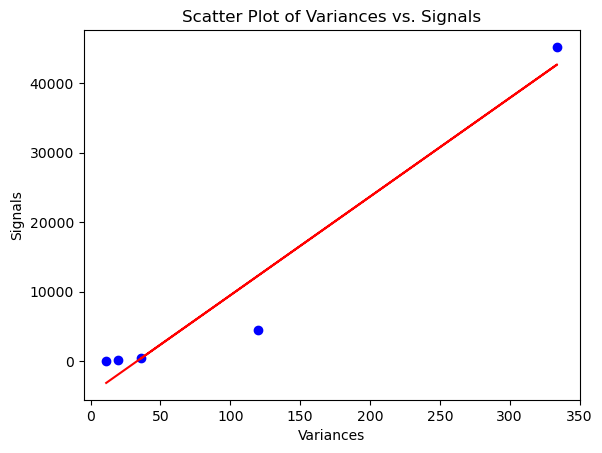

In [62]:
x_b = df_b['Variances']
y_b = df_b['Signals']


coeff_b = np.polyfit(x_b, y_b, 1)

fitted_b = np.polyval(coeff_b, x_b)


plt.scatter(x_b, y_b, color='blue')


plt.plot(x_b, fitted_b, color='red')

plt.xlabel('Variances')
plt.ylabel('Signals')
plt.title('Scatter Plot of Variances vs. Signals')


plt.show()


#This plot appears to be linear, but it is not "perfect" as it is a line of best fit
#since th epoints do not perfect match up. The 125s one appears to be a bit of an outlier.

In [63]:
slope, intercept = np.polyfit(x_b, y_b, 1)  

print("Slope:", slope)

Slope: 141.71877004845376


If g is the slope, then. the gain value found is around 141.7 electrons per ADU/pixel.

In [64]:
import glob

gain_bright = glob.glob("Flat_bright flat_100sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_202857_frame0003.fit")

for filename in gain_bright:
    header = fits.getheader(filename)
    gain_value = header.get('GAIN') 
    print(f"{filename}: GAIN = {gain_value}")


Flat_bright flat_100sec_Bin1_filter-B_-4.9C_gain0_2025-01-28_202857_frame0003.fit: GAIN = 0


This gain is 0 so in comparison to the one I found, it is smaller substaintially. I tried multiple bright flat frames and they all say 0. I am assuming I am computing an effective gain from the processed data that is based on the signal and variance, which could gives me a different value from the raw instrumental gain that seems to be 0 here.

#https://www.astro.umd.edu/~jph/ccd_theory.pdf
#https://labrigger.com/blog/2010/07/30/measuring-the-gain-of-your-imaging-system/